In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

df = pd.read_csv(
    "../output/monthly_category_summary_202201_202511.csv"
)

# YYYYMM → datetime (월 단위)
df['year_month'] = pd.to_datetime(df['year_month'].astype(str), format='%Y%m')
df = df.sort_values('year_month')

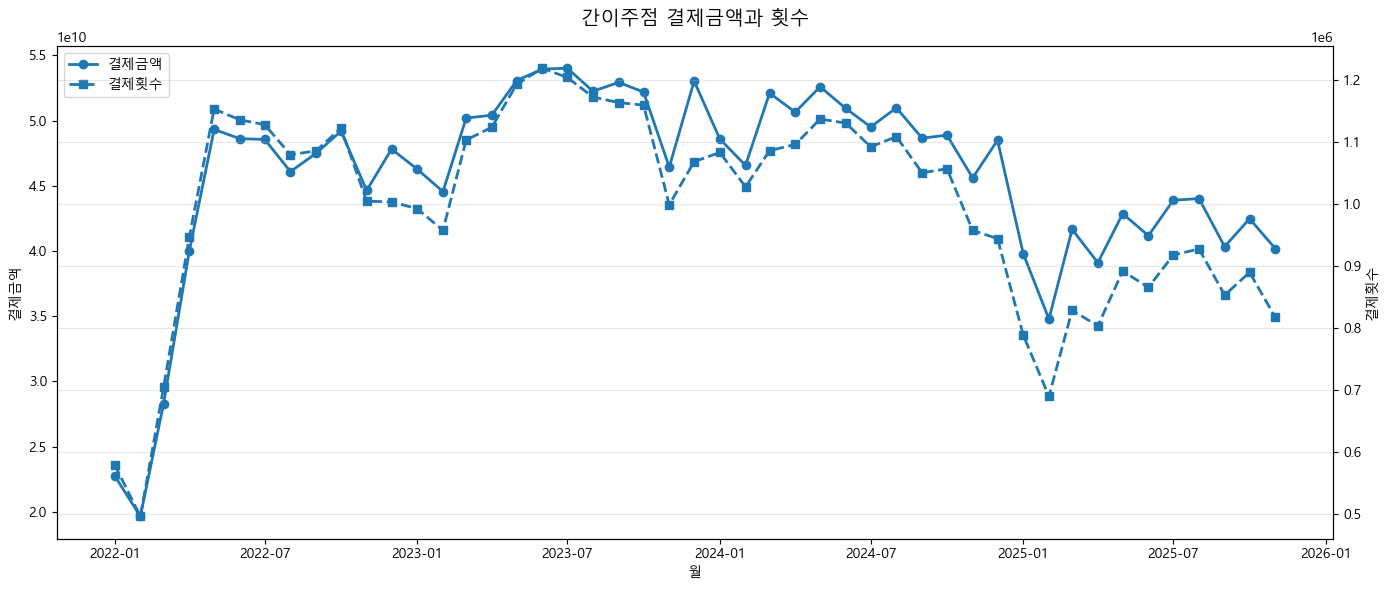

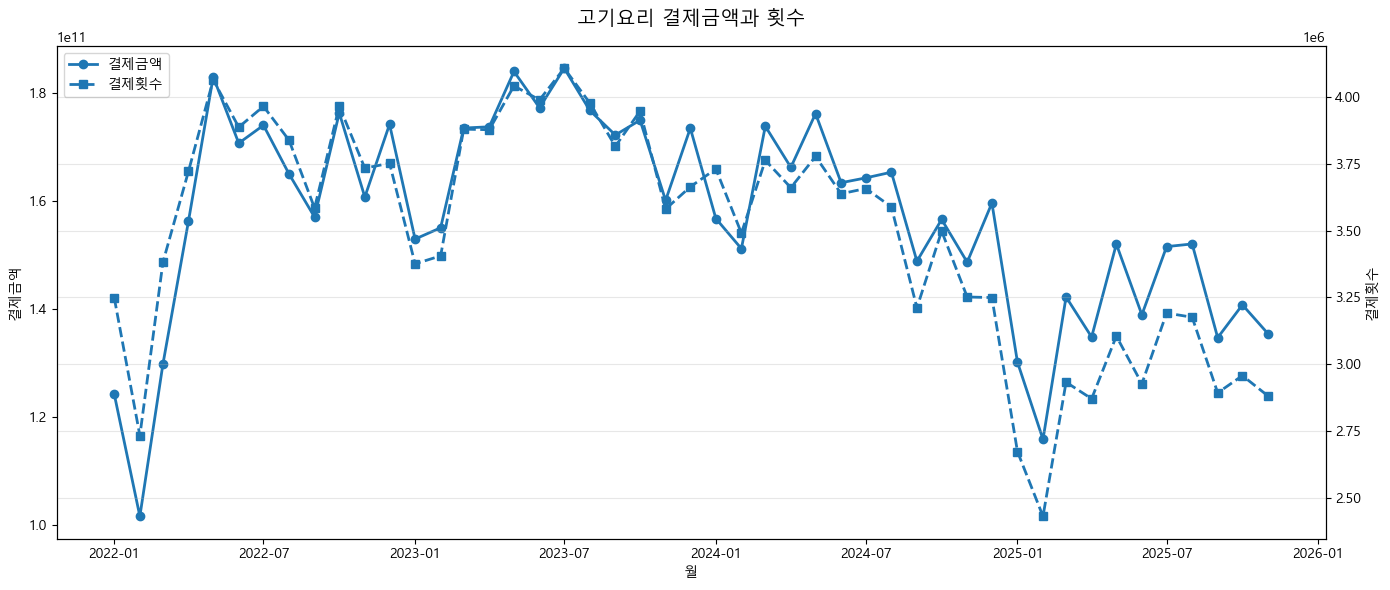

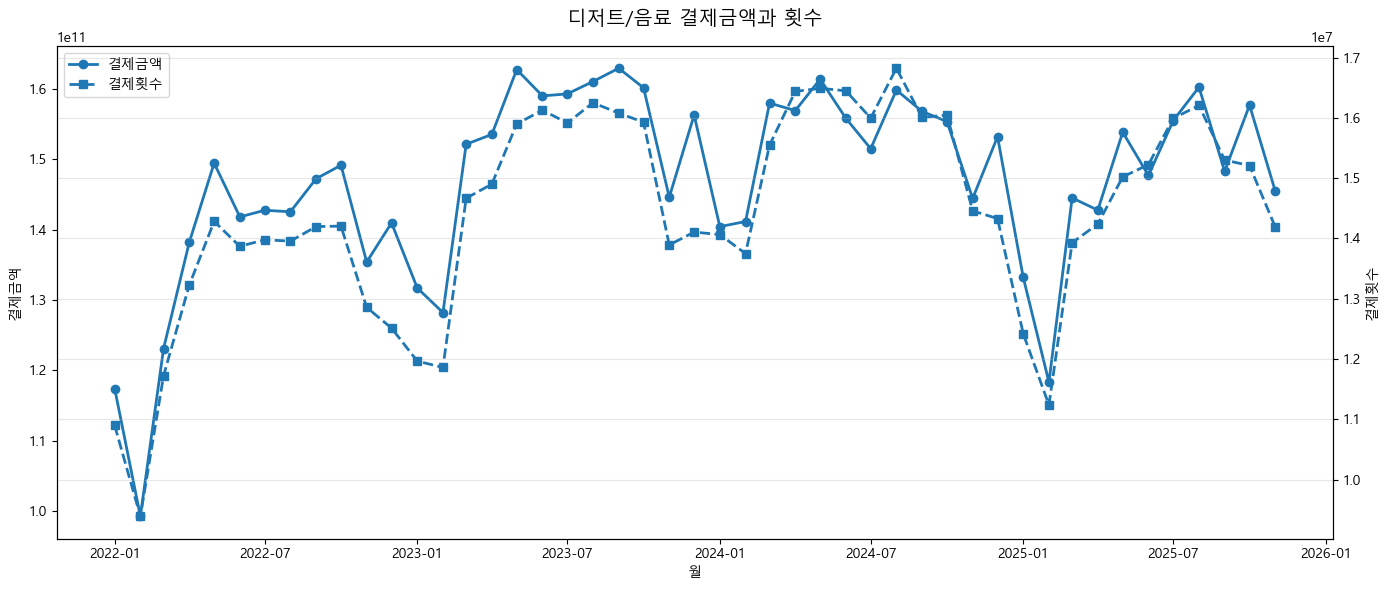

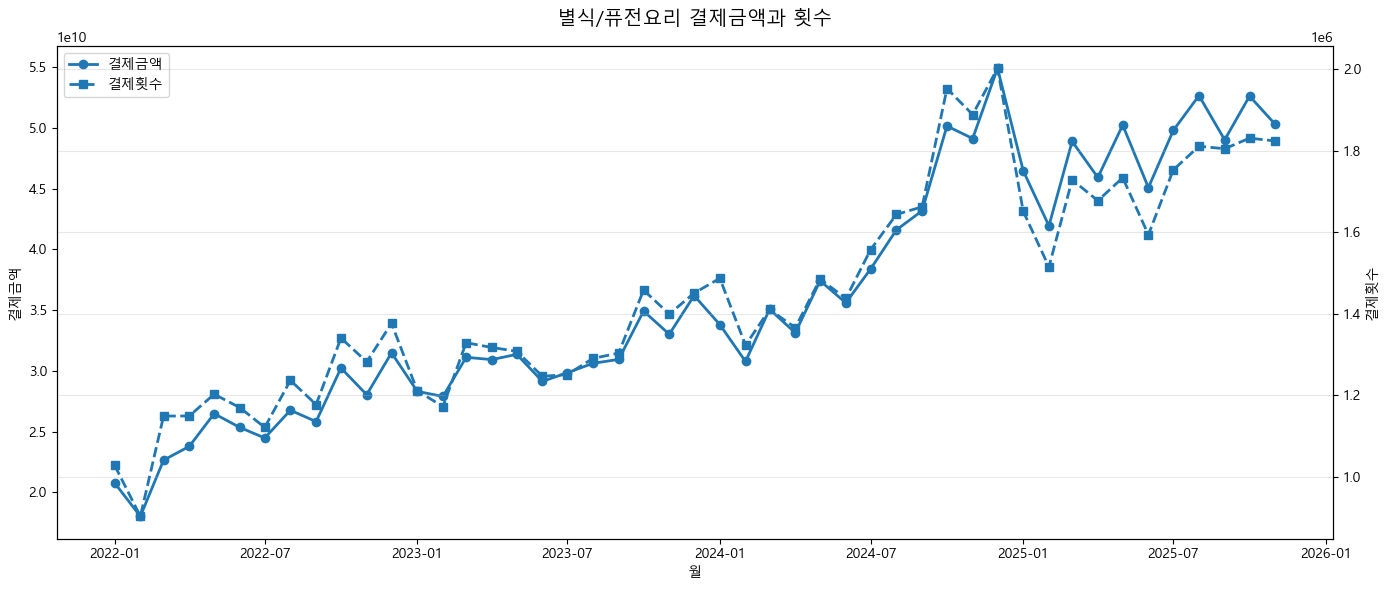

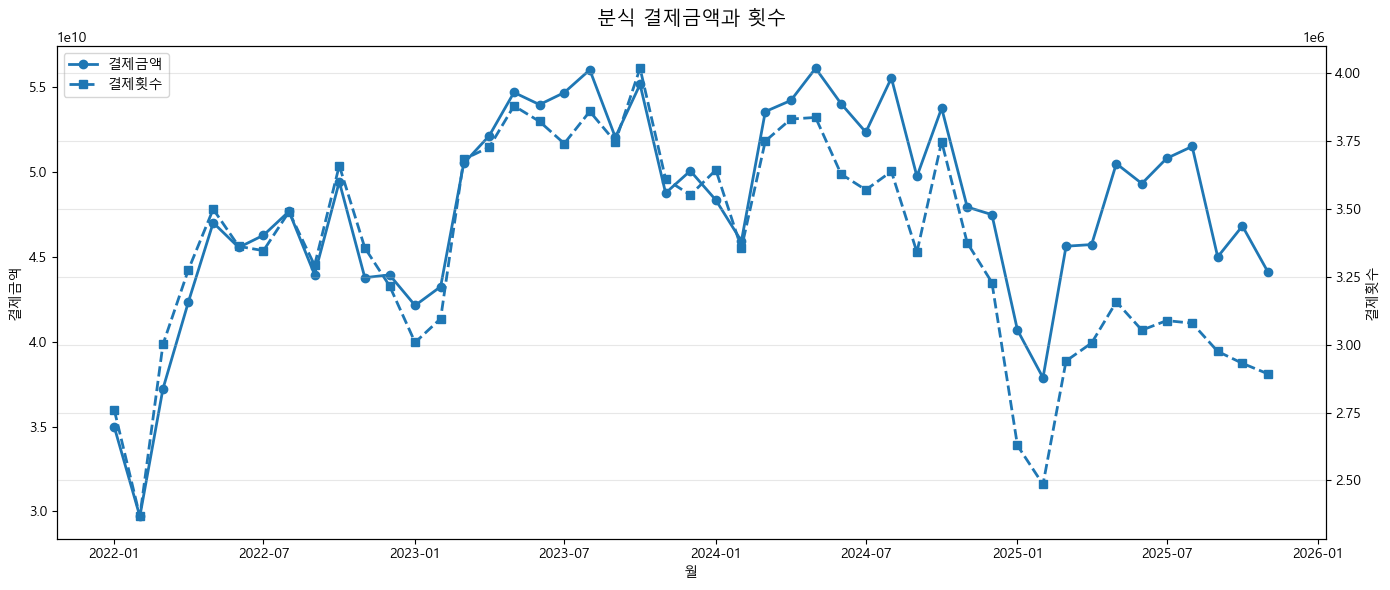

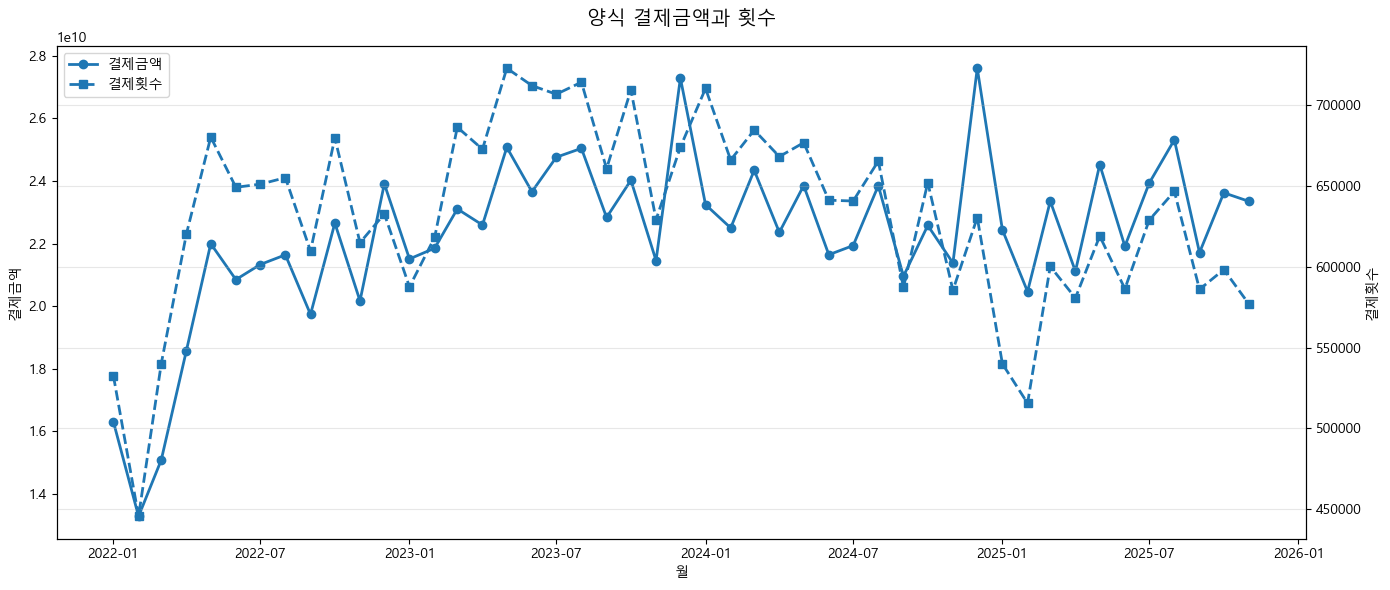

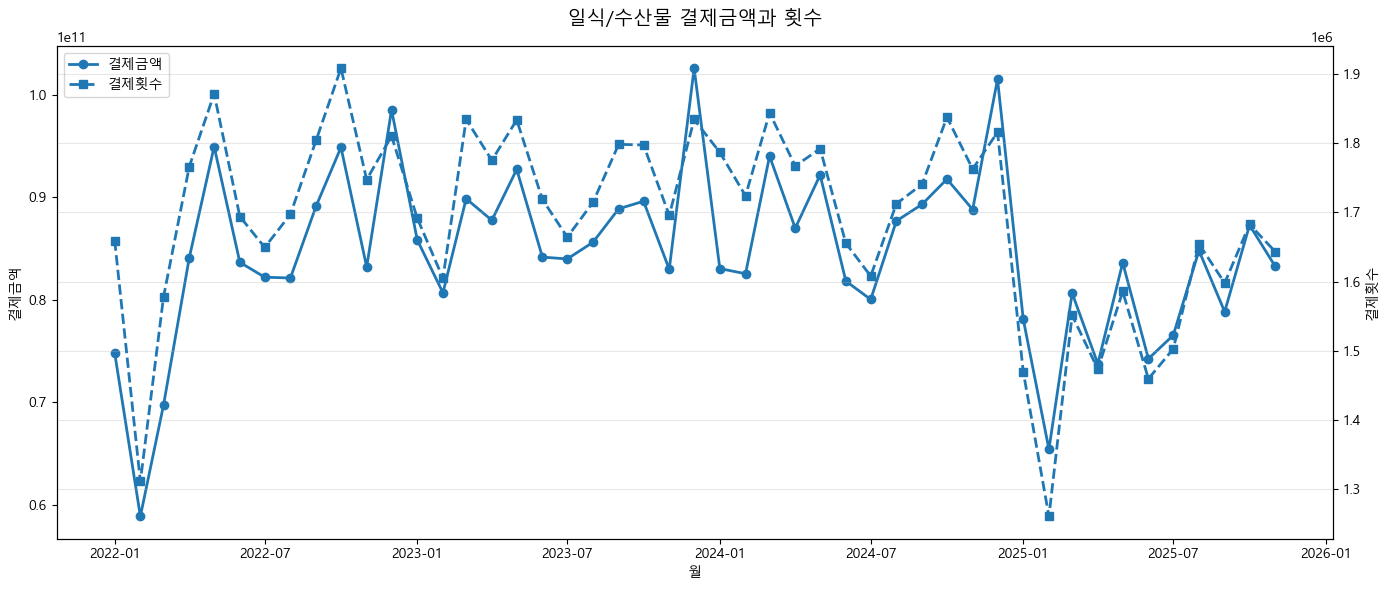

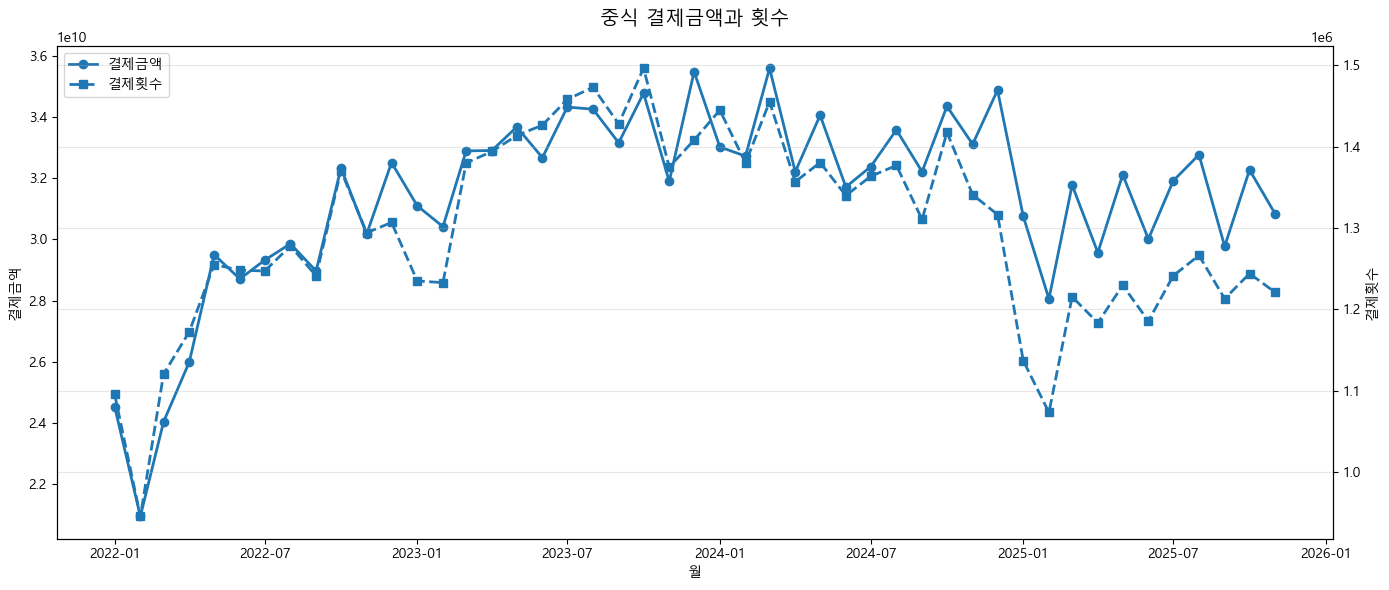

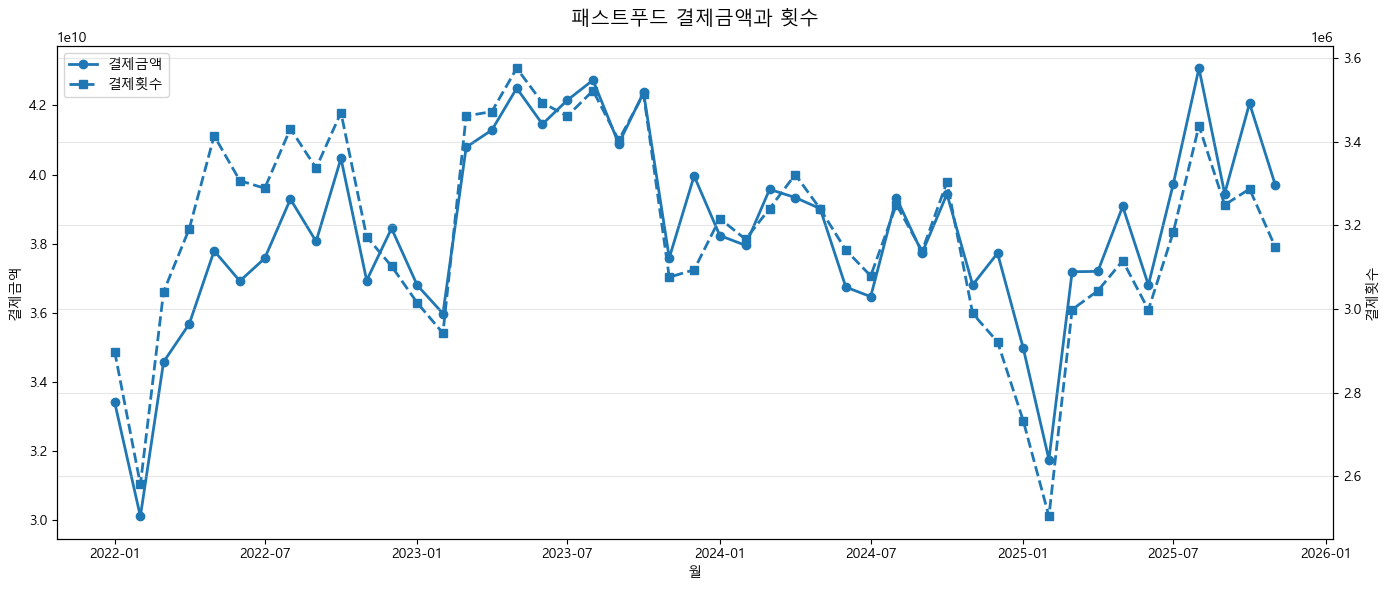

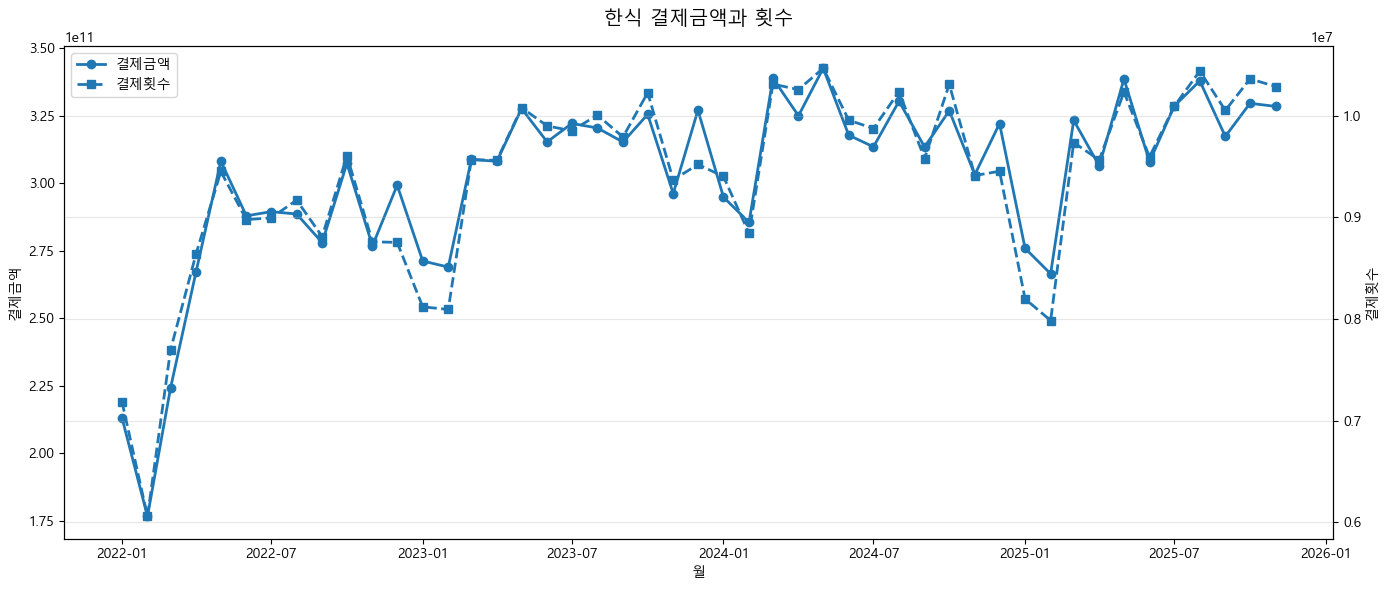

In [3]:
categories = df['category'].unique()

for category in categories:
    sub = df[df['category'] == category]

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # 결제금액 (좌측 y축)
    line1 = ax1.plot(
        sub['year_month'],
        sub['amt'],
        marker='o',
        linewidth=2,
        label='결제금액'
    )
    ax1.set_ylabel('결제금액')
    ax1.set_xlabel('월')

    # 결제횟수 (우측 y축)
    ax2 = ax1.twinx()
    line2 = ax2.plot(
        sub['year_month'],
        sub['cnt'],
        marker='s',
        linestyle='--',
        linewidth=2,
        label='결제횟수'
    )
    ax2.set_ylabel('결제횟수')

    # 제목
    plt.title(f"{category} 결제금액과 횟수", fontsize=14, pad=15)

    # 범례 통합
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    # x축 가독성
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

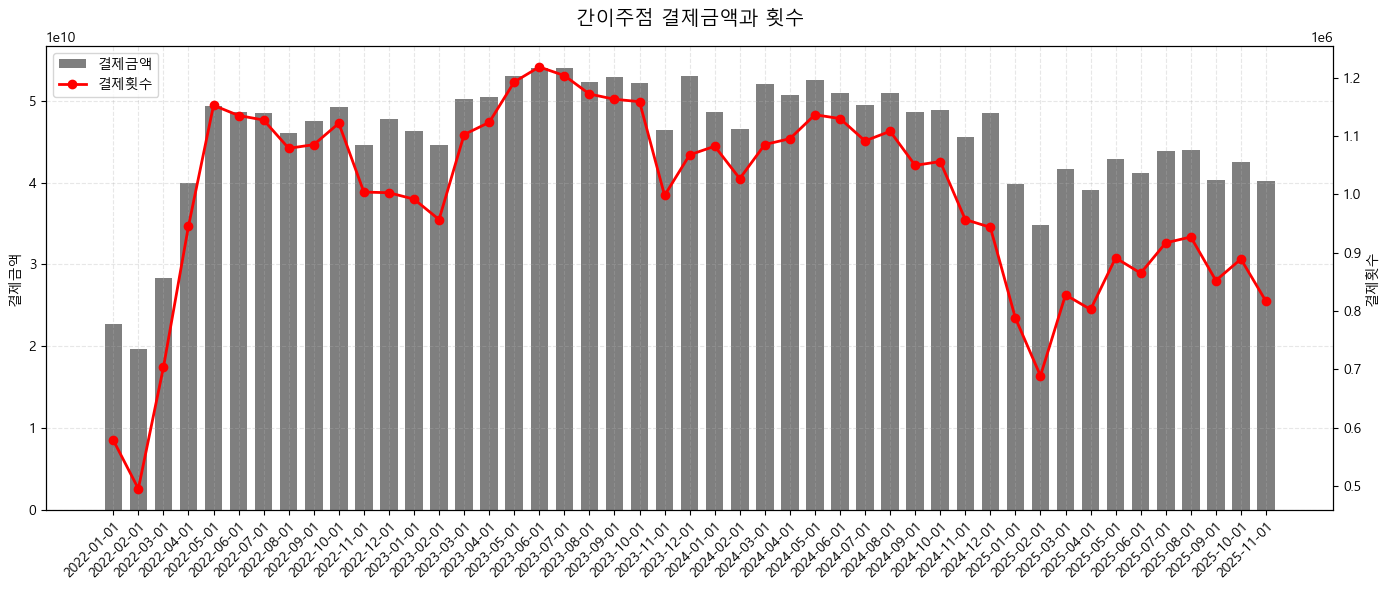

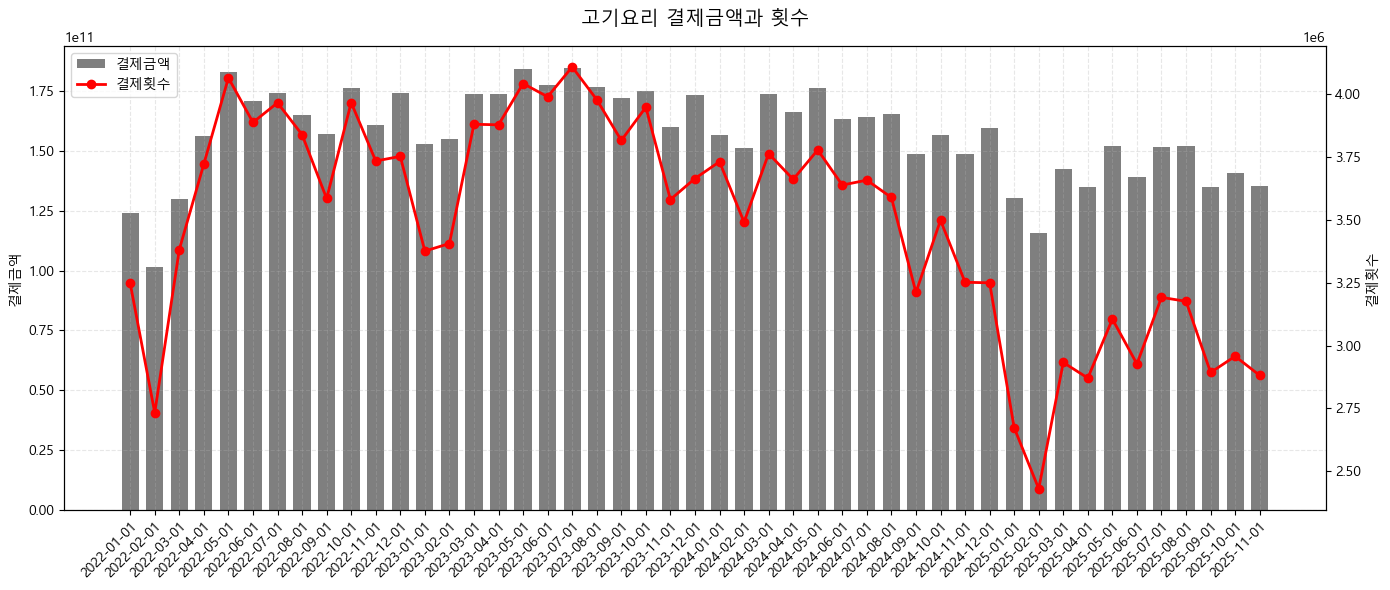

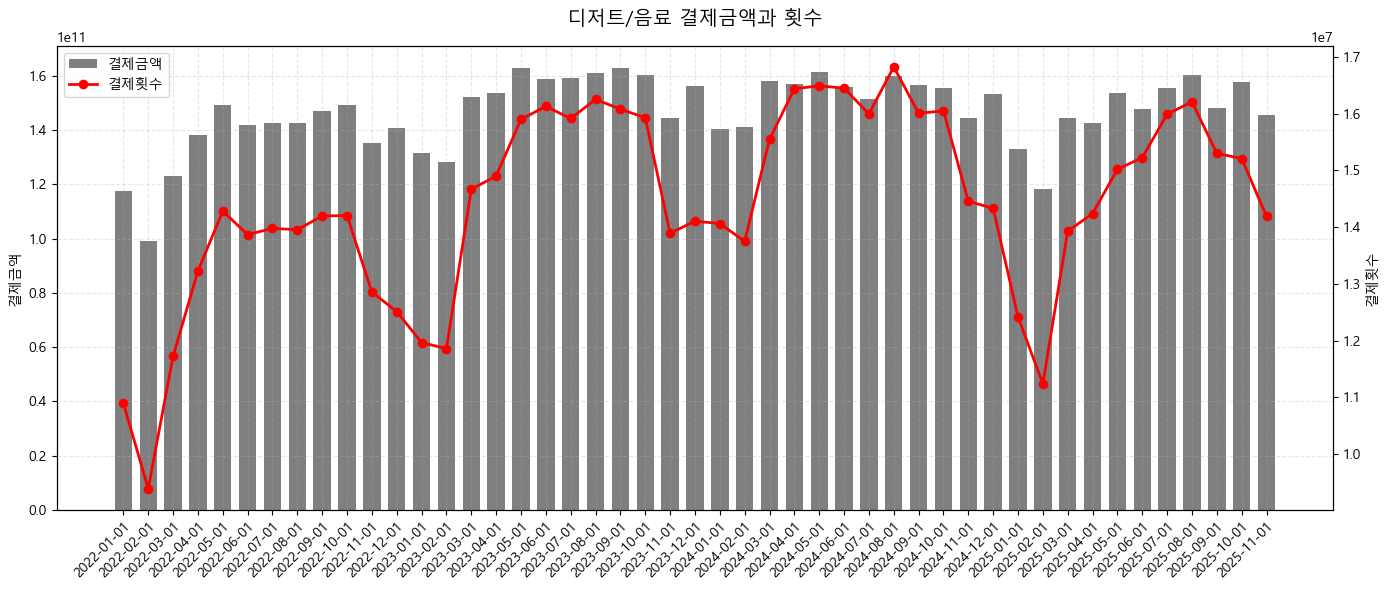

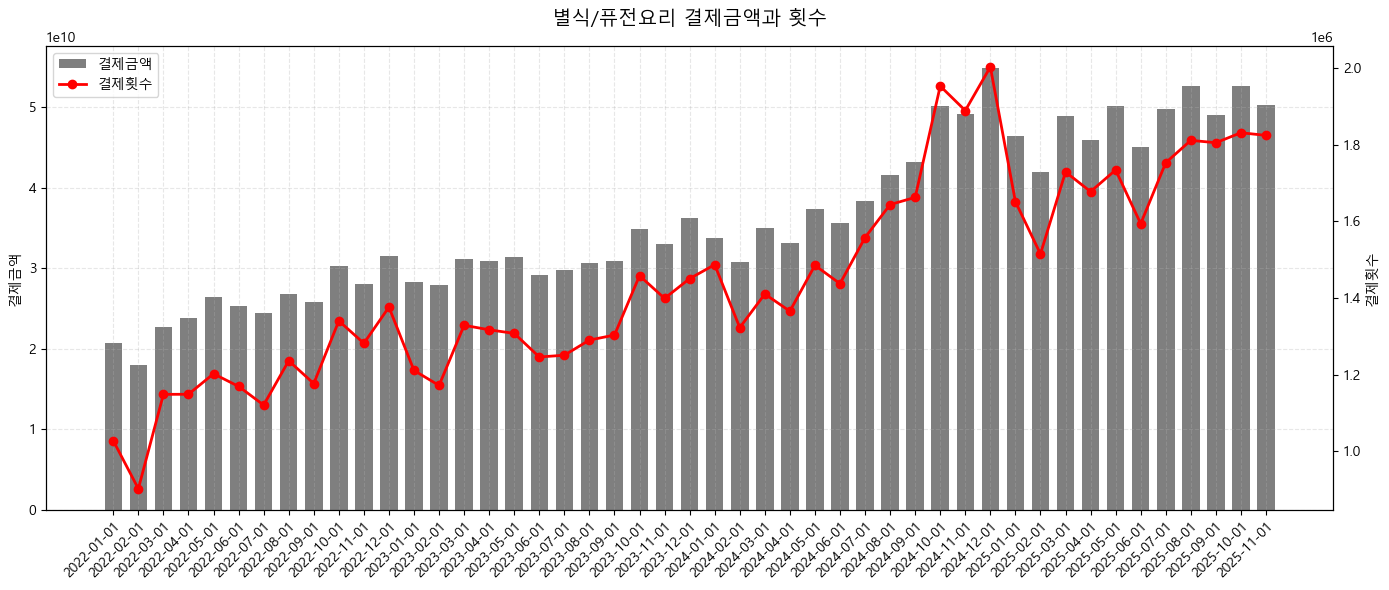

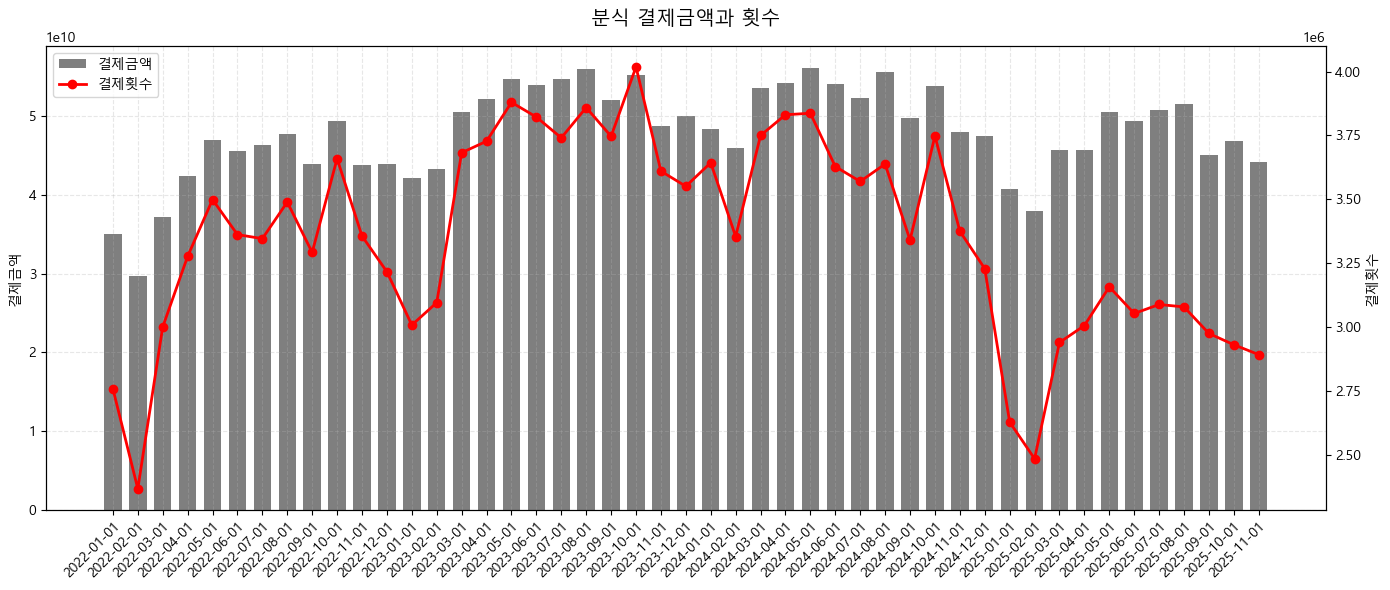

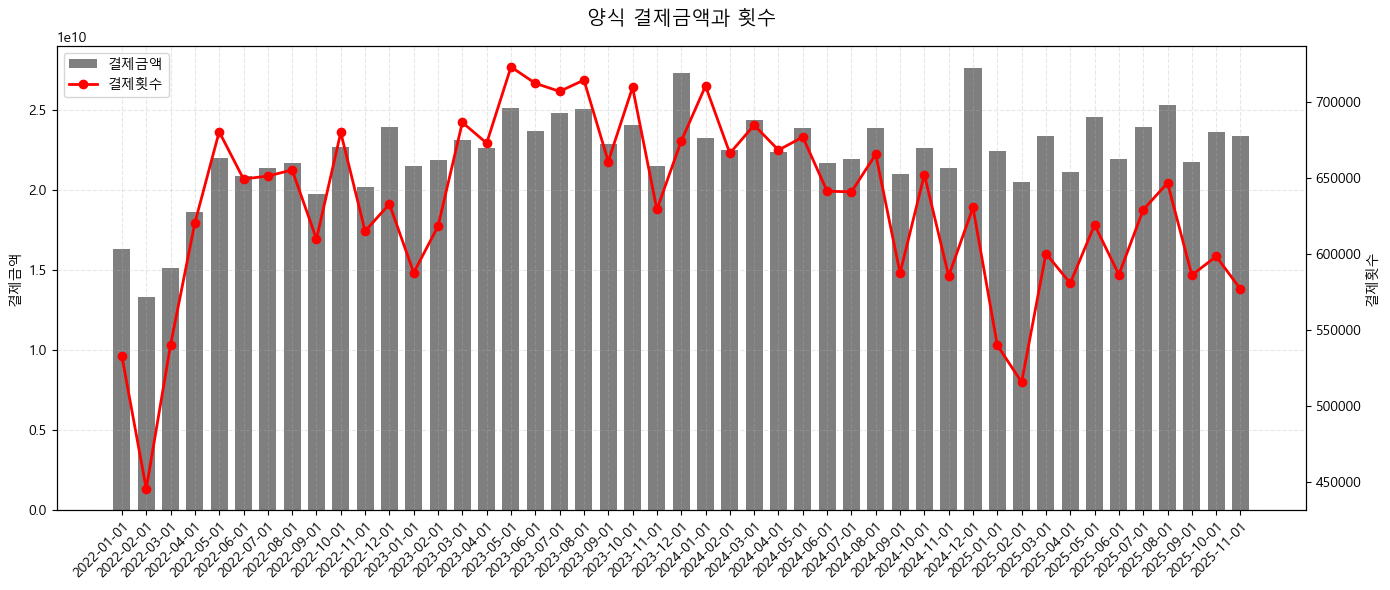

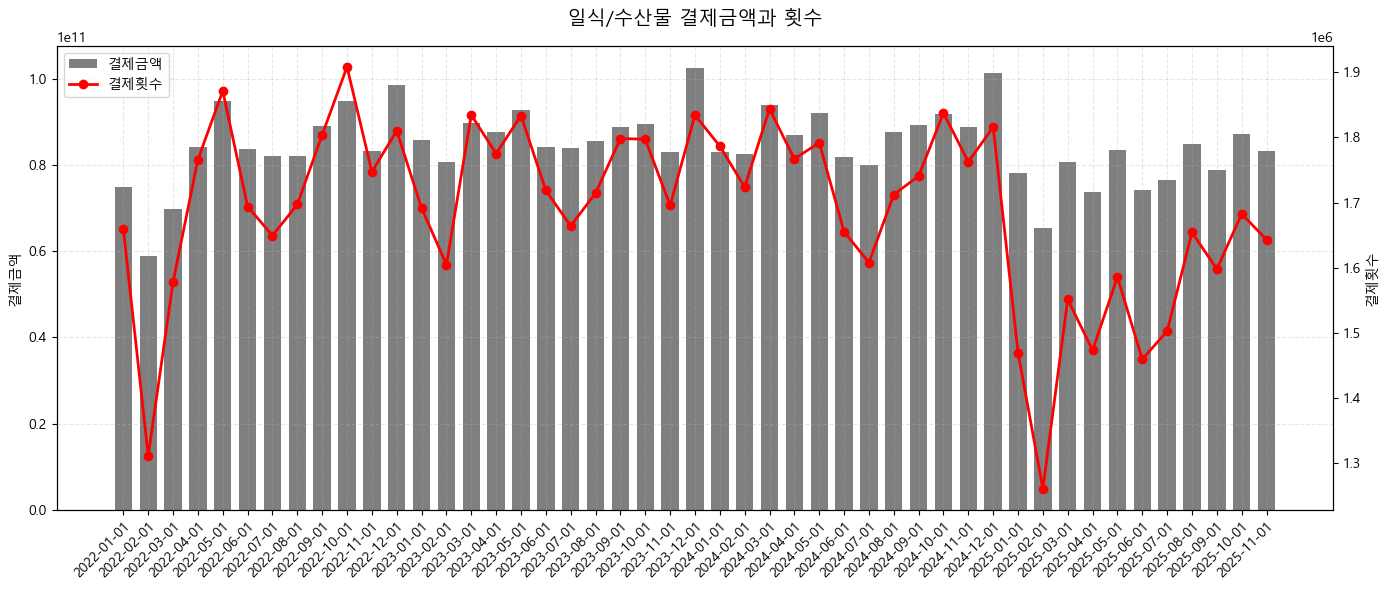

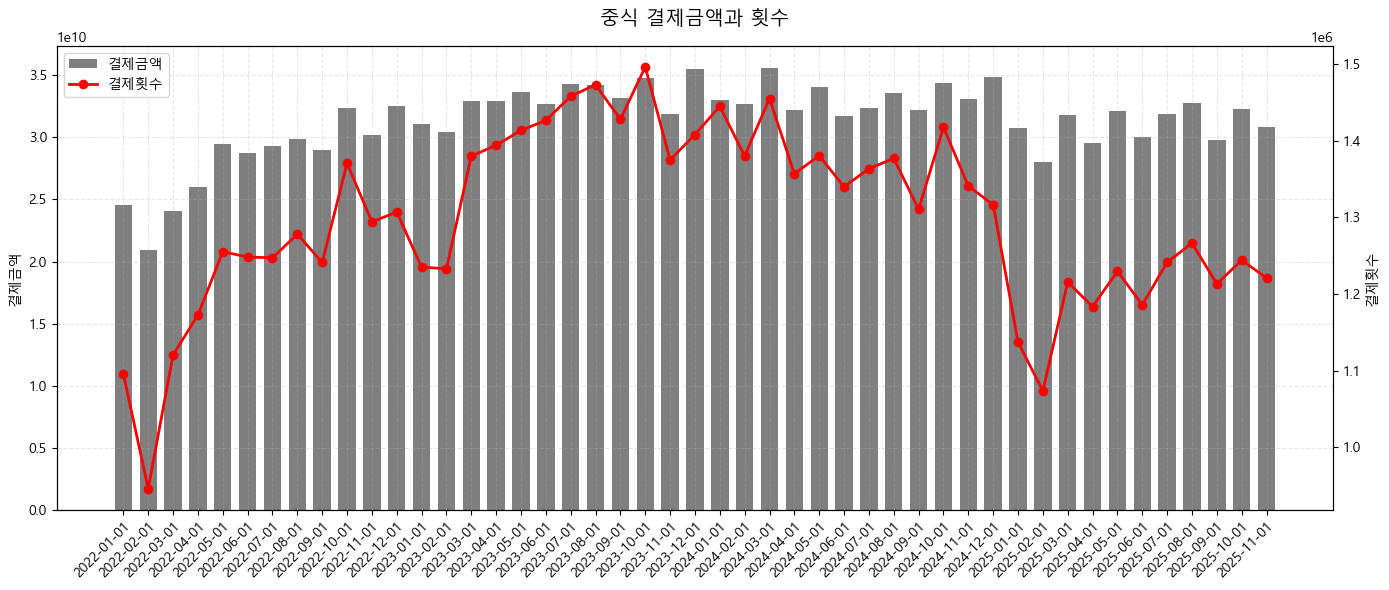

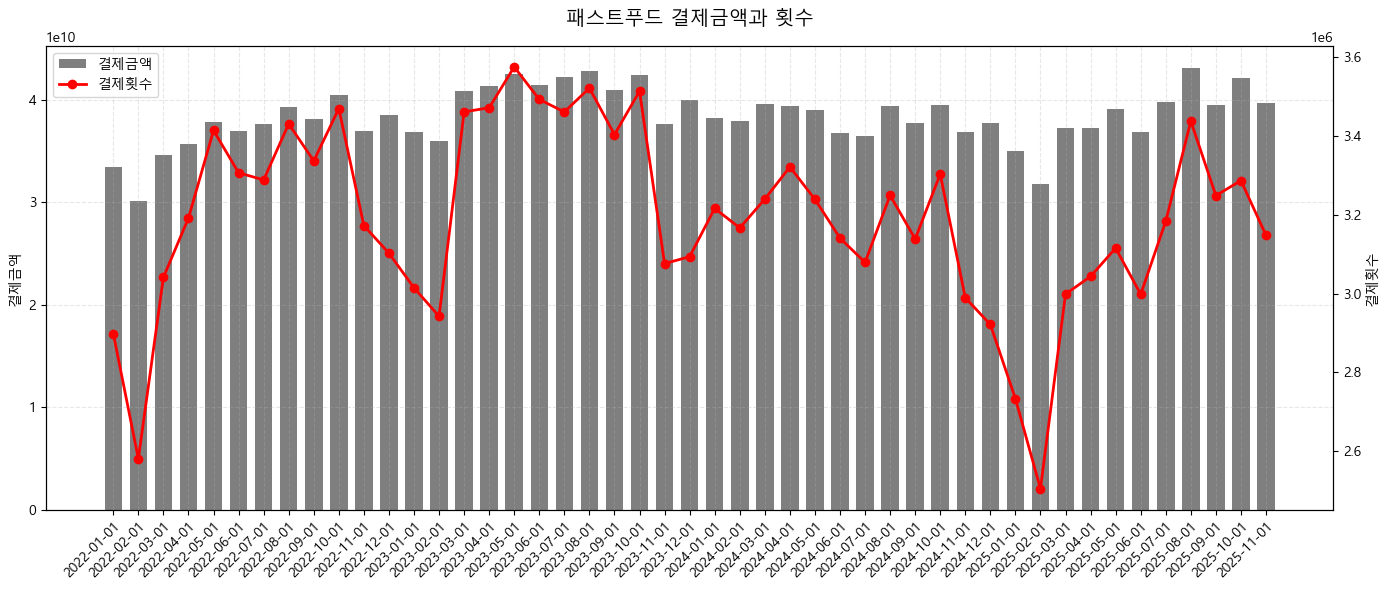

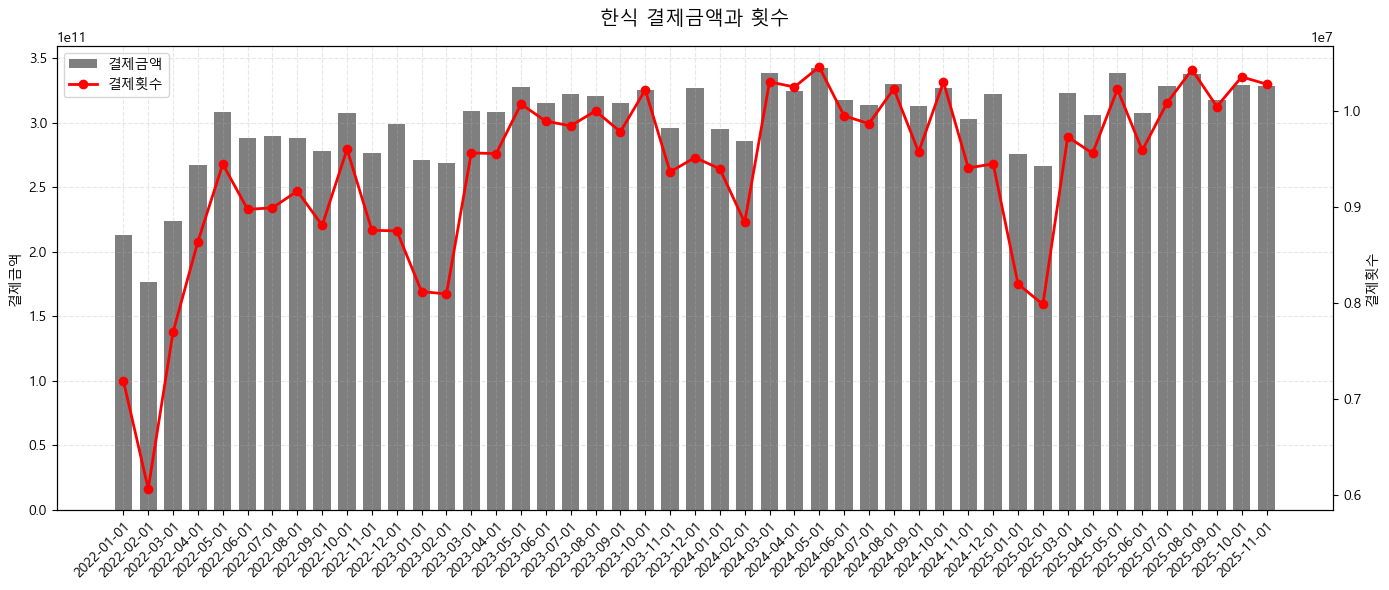

In [4]:
categories = df['category'].unique()

for category in categories:
    sub = df[df['category'] == category].copy()
    
    # X축 데이터 (문자열 변환)
    x_labels = sub['year_month'].astype(str).tolist()

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # 1. 결제금액 (막대 그래프)
    bar1 = ax1.bar(
        x_labels, # 리스트 형태의 문자열 전달
        sub['amt'], 
        color='black', 
        alpha=0.5, 
        width=0.7, 
        label='결제금액'
    )
    ax1.set_ylabel('결제금액')

    # 2. 결제횟수 (선 그래프)
    ax2 = ax1.twinx()
    line2 = ax2.plot(
        x_labels,
        sub['cnt'],
        color='red',
        marker='o',
        linewidth=2,
        label='결제횟수'
    )
    ax2.set_ylabel('결제횟수')

    # 3. [핵심] X축 라벨 회전 및 정렬
    # rotation_mode='anchor'와 ha='right'를 설정해야 막대 정중앙에 글자 끝이 맞물려 예쁘게 돌아갑니다.
    ax1.set_xticks(range(len(x_labels)))
    ax1.set_xticklabels(x_labels, rotation=45, ha='right', rotation_mode='anchor')

    # 4. 그리드 설정 (전체 출력)
    ax1.grid(True, axis='both', alpha=0.3, linestyle='--')

    # 5. 범례 및 제목
    lines = [bar1] + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')
    plt.title(f"{category} 결제금액과 횟수", fontsize=14, pad=15)

    plt.tight_layout()
    plt.show()

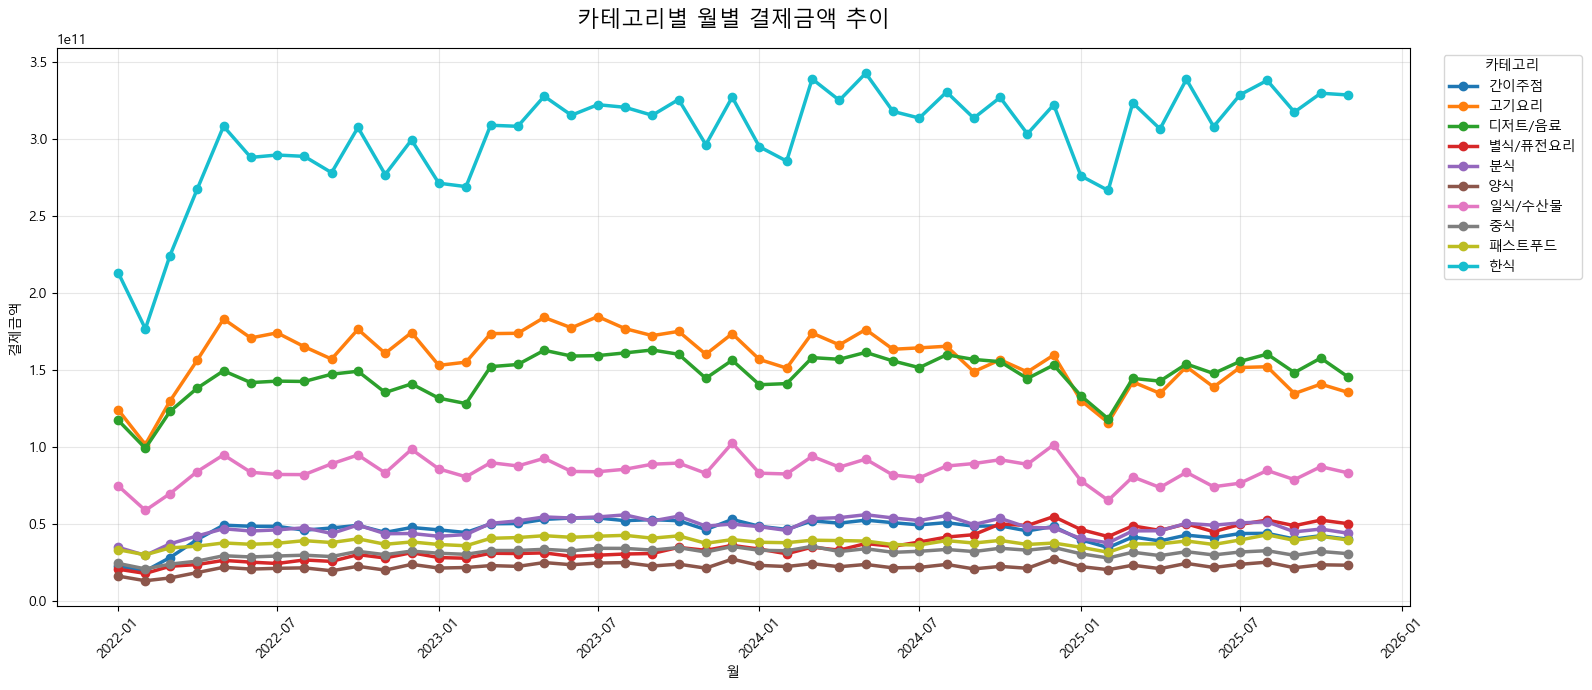

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))

categories = sorted(df["category"].unique())

# 🔥 명확한 색상 팔레트
colors = plt.cm.tab10.colors  # 최대 10개까지 매우 구분 잘 됨

for i, category in enumerate(categories):
    sub = df[df["category"] == category]

    plt.plot(
        sub["year_month"],
        sub["amt"],
        label=category,
        linewidth=2.5,
        marker="o",
        color=colors[i % len(colors)]
    )

plt.title("카테고리별 월별 결제금액 추이", fontsize=16, pad=15)
plt.xlabel("월")
plt.ylabel("결제금액")

plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# 🔥 범례를 그래프 밖으로
plt.legend(
    title="카테고리",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


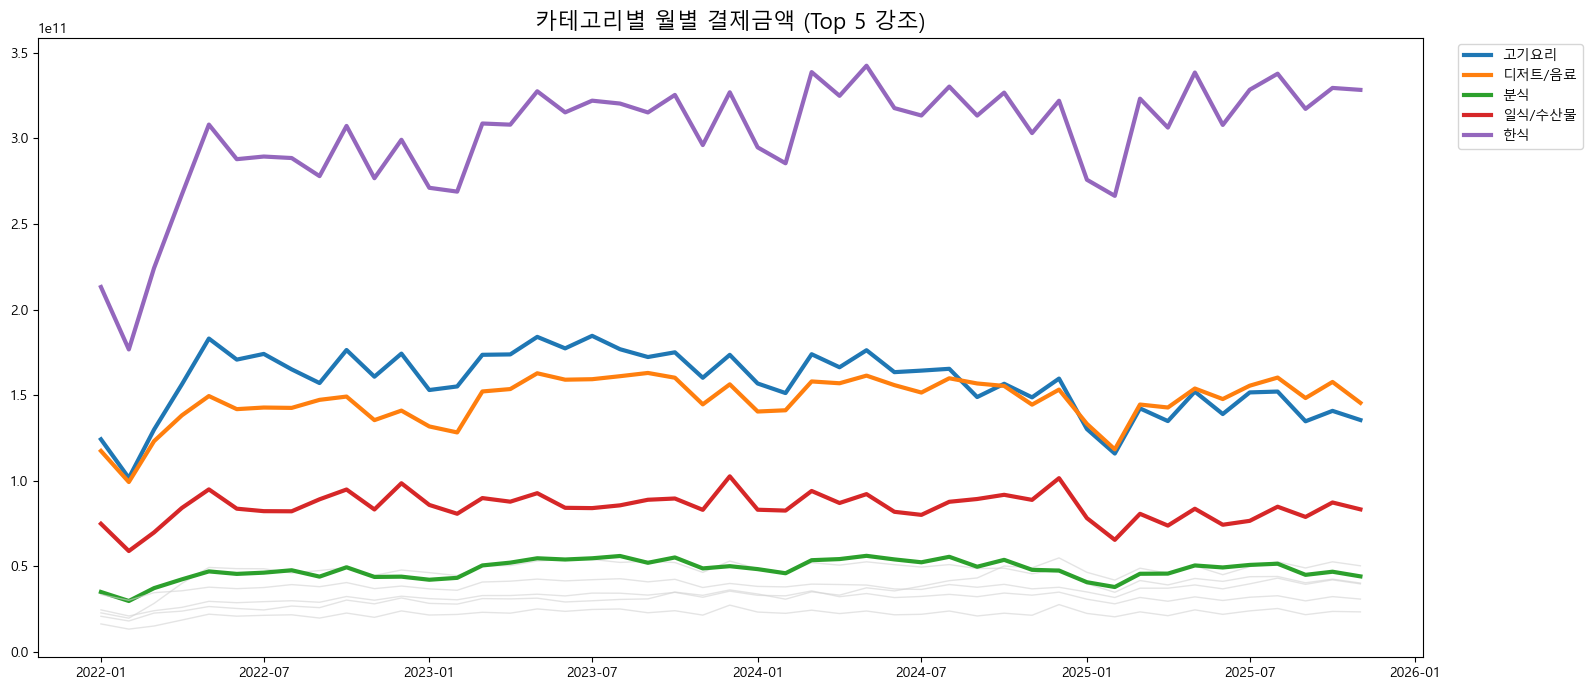

In [7]:
top_categories = (
    df.groupby("category")["amt"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

plt.figure(figsize=(16, 7))

for category in categories:
    sub = df[df["category"] == category]

    if category in top_categories:
        plt.plot(
            sub["year_month"], sub["amt"],
            label=category, linewidth=3
        )
    else:
        plt.plot(
            sub["year_month"], sub["amt"],
            color="lightgray", linewidth=1, alpha=0.6
        )

plt.title("카테고리별 월별 결제금액 (Top 5 강조)", fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


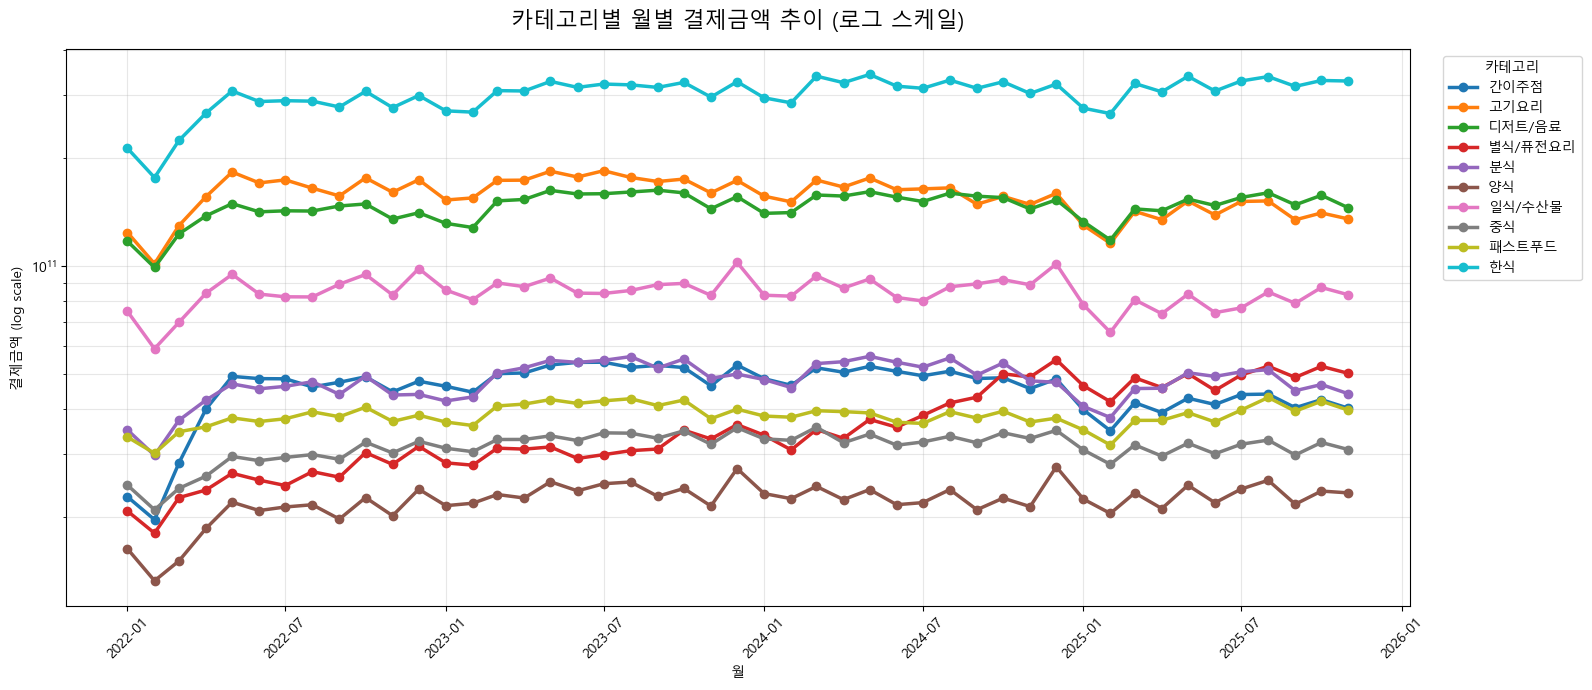

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))

categories = sorted(df["category"].unique())
colors = plt.cm.tab10.colors

for i, category in enumerate(categories):
    sub = df[df["category"] == category]

    plt.plot(
        sub["year_month"],
        sub["amt"],
        label=category,
        linewidth=2.5,
        marker="o",
        color=colors[i % len(colors)]
    )

# 🔥 로그 스케일 적용
plt.yscale("log")

plt.title("카테고리별 월별 결제금액 추이 (로그 스케일)", fontsize=16, pad=15)
plt.xlabel("월")
plt.ylabel("결제금액 (log scale)")

plt.xticks(rotation=45)
plt.grid(alpha=0.3, which="both")  # 로그 스케일에서는 both 권장

plt.legend(
    title="카테고리",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


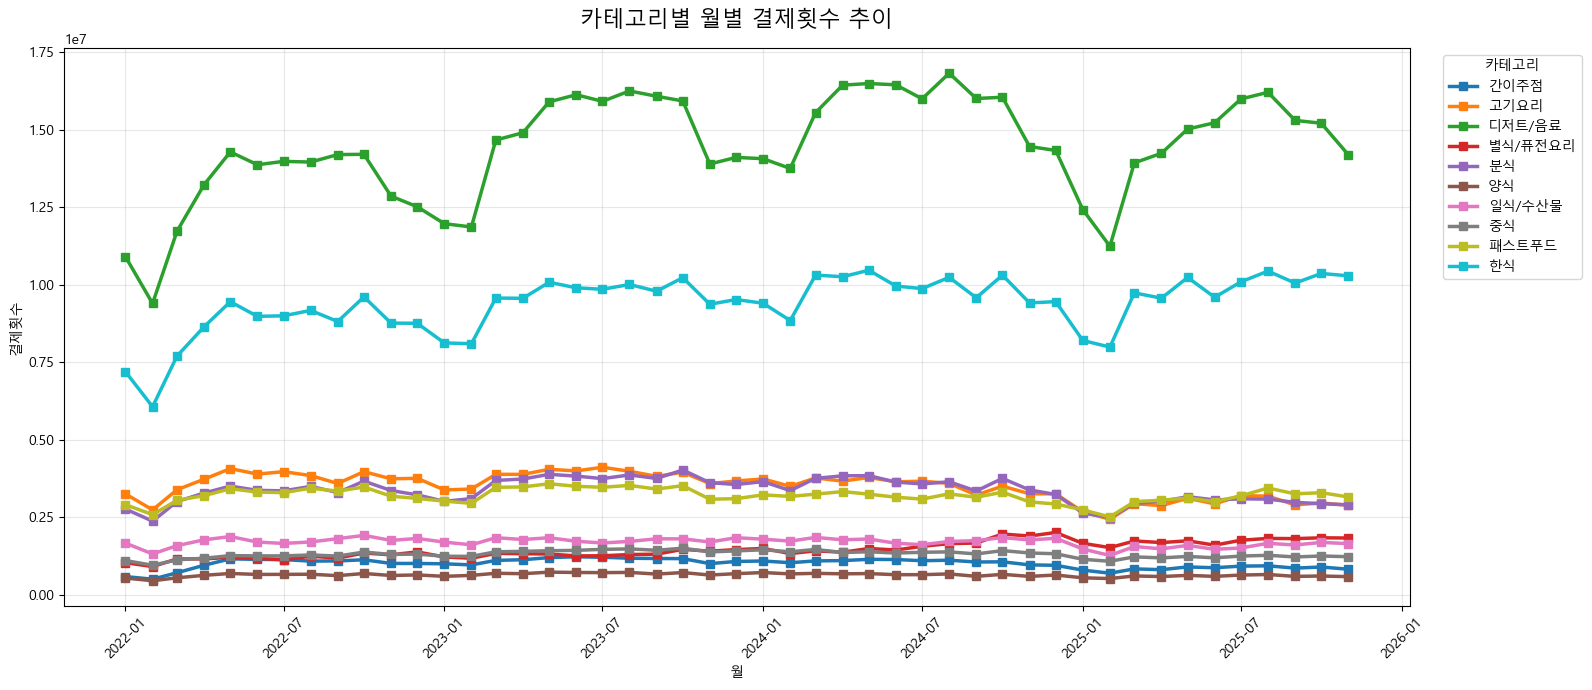

In [6]:
plt.figure(figsize=(16, 7))

for i, category in enumerate(categories):
    sub = df[df["category"] == category]

    plt.plot(
        sub["year_month"],
        sub["cnt"],
        label=category,
        linewidth=2.5,
        marker="s",
        color=colors[i % len(colors)]
    )

plt.title("카테고리별 월별 결제횟수 추이", fontsize=16, pad=15)
plt.xlabel("월")
plt.ylabel("결제횟수")

plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.legend(
    title="카테고리",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


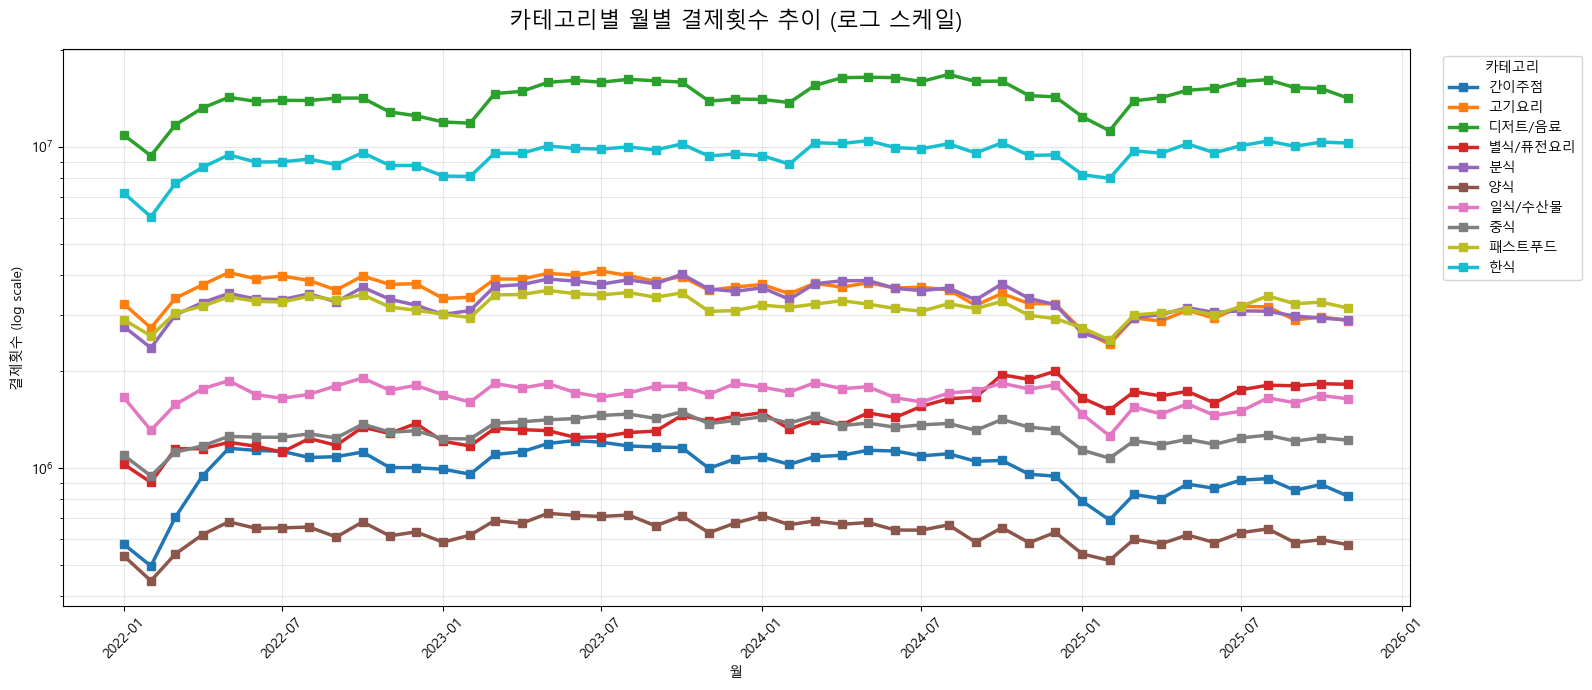

In [13]:
plt.figure(figsize=(16, 7))

for i, category in enumerate(categories):
    sub = df[df["category"] == category]

    plt.plot(
        sub["year_month"],
        sub["cnt"],
        label=category,
        linewidth=2.5,
        marker="s",
        color=colors[i % len(colors)]
    )
    
# 🔥 로그 스케일 적용
plt.yscale("log")

plt.title("카테고리별 월별 결제횟수 추이 (로그 스케일)", fontsize=16, pad=15)
plt.xlabel("월")
plt.ylabel("결제횟수 (log scale)")

plt.xticks(rotation=45)
plt.grid(alpha=0.3, which="both")  # 로그 스케일에서는 both 권장

plt.legend(
    title="카테고리",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()